    Feature1   Feature2  Target
0  32.483571  29.308678     0.0
1  33.238443  37.615149     0.0
2  28.829233  28.829315     0.0
3  37.896064  33.837174     0.0
4  27.652628  32.712800     0.0

Accuracy Score: 1.0

Confusion Matrix:
 [[12  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



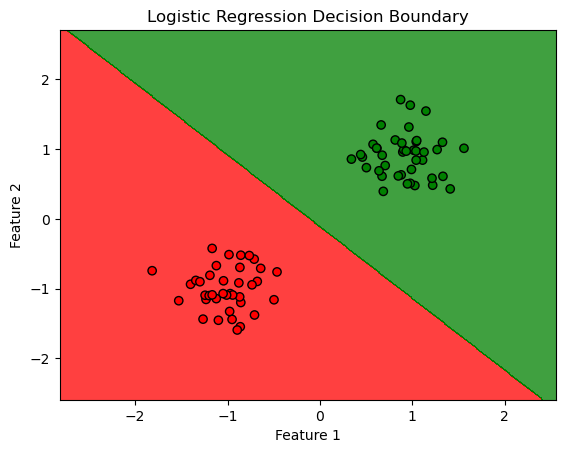

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Create a synthetic dataset
np.random.seed(42)

# Generate 100 data points for two classes (0 and 1)
X1 = np.random.normal(loc=30, scale=5, size=(50, 2))  # Class 0 (mean 30)
X2 = np.random.normal(loc=60, scale=5, size=(50, 2))  # Class 1 (mean 60)

# Combine features
X = np.vstack((X1, X2))

# Labels: First 50 are 0, next 50 are 1
y = np.hstack((np.zeros(50), np.ones(50)))

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

print(df.head())  # View first few rows

# Step 2: Split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train Logistic Regression Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = classifier.predict(X_test)

# Step 6: Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize Decision Boundary
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()